In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import statsmodels.regression.linear_model as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!pip install -q kaggle
from google.colab import files

files.upload()

In [0]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 99% 65.0M/66.0M [00:01<00:00, 33.7MB/s]
100% 66.0M/66.0M [00:01<00:00, 52.5MB/s]


In [0]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [0]:
!ls

creditcard.csv	creditcardfraud.zip  drive  kaggle.json  sample_data


In [0]:
df = pd.read_csv('creditcard.csv')

In [0]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
df.shape

(284807, 31)

In [0]:
X = df.iloc[:,0:30] #features 
Xlen = X.shape[0]
Xones = np.ones(Xlen).reshape(-1,1)
X.insert(0, 'Const', Xones) #agrego termino de constante para backward elimination

In [0]:
#scaleo time y amount
from sklearn.preprocessing import RobustScaler
rc = RobustScaler()

X['Time'] = rc.fit_transform(X['Time'].values.reshape(-1,1))
X['Amount'] = rc.fit_transform(X['Amount'].values.reshape(-1,1))

In [0]:
X.head()

,Const,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274
1,1.0,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825
2,1.0,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721
3,1.0,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291
4,1.0,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579


In [0]:
Xvals = X.values

In [0]:
clases = df['Class']

In [0]:
ols = sm.OLS(endog=clases, exog=Xvals).fit()
print(ols.summary())
#elijo un valor de significancia de 0.05

                            OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                 1.035e+04
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:03:37   Log-Likelihood:             6.0697e+05
No. Observations:              284807   AIC:                        -1.214e+06
Df Residuals:                  284776   BIC:                        -1.214e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013    7.5e-05     17.306      0.0

In [0]:
print(X.columns[24])
X2 = X.drop(X.columns[24], axis=1)
X2.head()

V23


,Const,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V24,V25,V26,V27,V28,Amount
0,1.0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274
1,1.0,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825
2,1.0,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721
3,1.0,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291
4,1.0,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579


In [0]:
X2vals = X2.values
ols2 = sm.OLS(endog=clases, exog=X2vals).fit() #sigo
print(ols2.summary()) #queda asi.

                            OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                 1.071e+04
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:03:38   Log-Likelihood:             6.0697e+05
No. Observations:              284807   AIC:                        -1.214e+06
Df Residuals:                  284777   BIC:                        -1.214e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013    7.3e-05     18.180      0.0

In [0]:
#iba a usar Pycaret para comparar modelos, pero es hyper lento asi que lo hago manual.
# -- Pycaret
#!pip install pycaret
#from pycaret.classification import *
#armo mi dataset final (como lo espera pycaret)
#X2['Clases'] = clases
#cf = setup(X2,target='Clases')
#compare_models()
# ------

In [0]:
clases = df['Class']

clasesPositivas = sum(1 for i in clases if i == 1) #solo 492 son casos positivos de fraude. Voy a tener que solucionar el imbalance de alguna manera. Random oversampling o undersampling.
#voy con oversampling.

X2 = X2.drop('Const',axis=1)

x_train,x_test,y_train,y_test= train_test_split(X2.values,clases,test_size=0.2) #primero armo el test set y despues hago el oversampling en el train set

clasesPositivas = sum(1 for i in y_train if i == 1)
print(clasesPositivas)

Xvalues = X.values

386


In [0]:
from imblearn.over_sampling import SMOTE
X_res_train, y_res_train = SMOTE().fit_resample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Relacion Fraude/NoFraude en trainset con oversampling (SMOTE) total original')

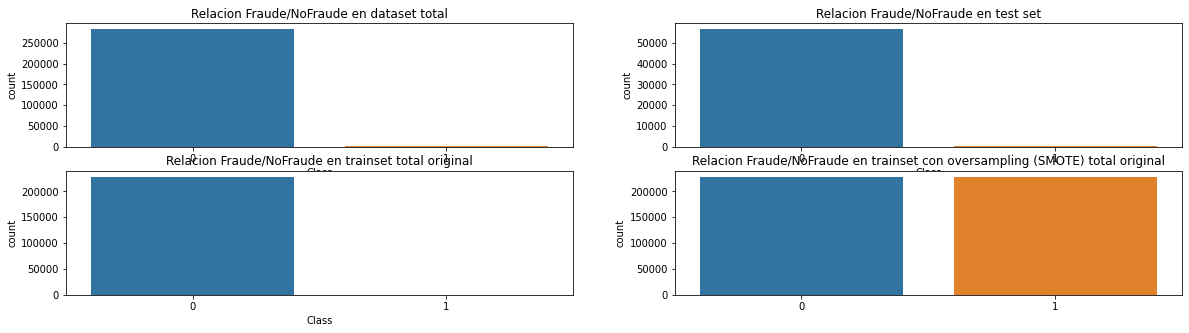

In [0]:
import seaborn as sea

fig, ax = plt.subplots(2,2,figsize=(20,5))

sea.countplot('Class', data=df, ax=ax[0][0])
ax[0][0].set_title('Relacion Fraude/NoFraude en dataset total')
sea.countplot(x=y_test, ax=ax[0][1])
ax[0][1].set_title('Relacion Fraude/NoFraude en test set')
sea.countplot(x=y_train, ax=ax[1][0])
ax[1][0].set_title('Relacion Fraude/NoFraude en trainset total original')
sea.countplot(x=y_res_train, ax=ax[1][1])
ax[1][1].set_title('Relacion Fraude/NoFraude en trainset con oversampling (SMOTE) total original')

In [0]:
!pip install pycaret
from pycaret.classification import * 

dataset = pd.DataFrame({'Column0': X_res_train[:,0]})
for i in range(0,29):
  dataset['Column'+str(i)] = X_res_train[:,i]

dataset

     |████████████████████████████████| 194kB 2.6MB/s 
     |████████████████████████████████| 1.2MB 8.5MB/s 
     |████████████████████████████████| 266kB 15.1MB/s 
     |████████████████████████████████| 1.6MB 17.3MB/s 
     |████████████████████████████████| 102kB 9.8MB/s 
     |████████████████████████████████| 1.2MB 25.2MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 133kB 39.5MB/s 
     |████████████████████████████████| 7.0MB 28.2MB/s 
     |████████████████████████████████| 63.9MB 63kB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 389kB 52.2MB/s 
     |████████████████████████████████| 6.3MB 30.6MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 552kB 30.0MB/s 
     |████████████████████████████████| 2.1MB 30.2MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 604kB 42.6MB/s 
    

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28
0,-0.222336,-0.479395,0.827120,0.942142,1.447877,0.138883,-0.114152,0.973000,-0.075928,-1.084462,0.330518,0.969045,0.055974,-0.718705,0.830909,0.851122,-0.357517,-0.106204,0.395662,2.046740,0.110170,-0.225571,-0.753517,-0.055130,-0.578427,-0.569448,0.058237,0.166373,1.067561
1,-0.550535,1.501876,-1.110409,0.604284,-1.421197,-1.583213,-0.511212,-1.212762,-0.138357,-1.626255,1.408078,-0.889154,-0.849221,1.092372,-0.606617,0.832354,-0.022243,0.169699,0.421327,-0.262247,-0.243408,-0.078428,0.175211,-0.110501,0.414714,-0.075368,0.050898,0.025959,0.095019
2,0.695861,2.110864,-0.647788,-0.854270,-0.642877,-0.830365,-0.962824,-0.760517,-0.219812,-0.151298,0.161829,-0.258976,0.021383,1.466899,-1.939736,0.212815,1.636285,0.949371,-1.083944,0.475021,0.138910,-0.090950,-0.224667,-0.206815,-0.444209,-0.484350,0.031005,-0.007252,0.195626
3,-0.494437,0.593730,-2.311744,-0.549637,-1.016688,-1.457791,-0.672791,0.076013,-0.367918,-2.252139,1.190847,-0.146036,-0.695355,0.508681,0.079298,0.603256,-0.889862,0.942640,-0.922181,-0.476473,0.589434,-0.192514,-1.247622,0.050792,0.096263,-0.470543,-0.069058,0.094297,6.469364
4,-0.529153,-1.117636,1.067011,1.234576,-0.507356,-0.453172,-0.861092,0.305787,0.421190,0.153148,-0.824225,-1.159106,-0.175509,-1.096010,0.233117,-0.640638,-0.060191,0.093573,-0.506410,-0.077777,-0.171116,-0.154508,-0.427809,0.402890,0.002038,0.370772,0.020504,0.093134,-0.251520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454913,-0.222493,-7.880332,-2.861393,-4.625667,6.165674,-2.699388,-0.158733,-3.153491,0.998645,-2.534105,-3.836957,5.140632,-5.538748,-0.073143,-6.640490,1.902794,-4.219643,-8.386643,-3.019344,1.311020,-1.236859,0.256260,0.256945,0.057177,-0.950136,0.190197,1.689062,-1.482844,9.121831
454914,-0.778643,-14.524164,6.555318,-17.783332,11.264713,-4.297736,-3.304794,-16.448528,-1.405069,-6.834629,-13.697240,10.530874,-15.020695,0.180969,-15.044858,-0.264244,-8.650692,-12.793299,-5.103713,0.580568,1.101801,-2.474290,0.363107,-0.826941,0.198694,0.758398,2.682702,-1.002876,-0.293440
454915,0.748245,-1.476069,3.798962,-7.550412,3.127194,-1.272094,-2.115897,-2.381714,1.447929,-2.501637,-5.163998,1.978440,-5.978698,-1.207906,-6.758771,0.035422,-4.302885,-5.419616,-1.547955,1.033651,0.125049,1.075989,1.021559,0.245893,-0.670032,-0.294251,0.557752,0.375757,1.389120
454916,-0.069203,-13.273753,7.457632,-16.583514,7.000078,-11.135885,-2.361423,-17.225783,-0.203170,-5.556082,-14.679657,6.518232,-14.049230,0.102212,-7.214650,-1.175677,-11.630379,-19.631481,-8.287457,2.453000,0.536013,-1.148103,1.561040,0.516110,-0.352377,-0.171966,-1.240123,-0.732279,0.735103


In [0]:
dataset['Clases'] = y_res_train
cf = setup(dataset,target='Clases')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1989
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(454918, 30)"
4,Missing Values,False
5,Numeric Features,29
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [0]:
compare_models() #es super lento, pero documenta bien los accuracy metrics de distintos modelos.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.999900,1.000000,1.000000,0.999800,0.999900,0.999800
1,Extra Trees Classifier,0.999900,1.000000,1.000000,0.999800,0.999900,0.999800
2,CatBoost Classifier,0.999500,1.000000,1.000000,0.999000,0.999500,0.999000
3,Light Gradient Boosting Machine,0.999400,0.999800,0.999900,0.999000,0.999400,0.998800
4,K Neighbors Classifier,0.998700,0.999600,1.000000,0.997400,0.998700,0.997400
5,Decision Tree Classifier,0.997900,0.997900,0.998900,0.996900,0.997900,0.995800
6,Extreme Gradient Boosting,0.984600,0.999200,0.980000,0.989200,0.984600,0.969300
7,Gradient Boosting Classifier,0.983400,0.999000,0.978500,0.988200,0.983300,0.966800
8,Ada Boost Classifier,0.970000,0.997200,0.960400,0.979200,0.969700,0.940000
9,SVM - Linear Kernel,0.957400,0.000000,0.941000,0.972900,0.956700,0.914800


In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion="entropy",random_state=0,verbose=3)
classifier.fit(X_res_train,y_res_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.0s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.1min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=3,
                       warm_start=False)

In [0]:
y_pred = classifier.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


Confusion matrix, without normalization
[[56847     9]
 [   22    84]]


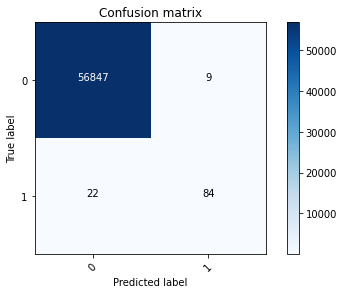

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, list(range(2)))

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.90      0.79      0.84       106

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

